This kernal is for the "Taxi company usually used in Chicago" Task. For this challenge I would like to view which company has been the most popular overall and look to see if there is any seasonality to this trend. 

Part 2 of this notebook will cover the second task from the dataset: "Mode of payment usually used" and I'm planning to finish that by Febuary 3rd. I'm currently in week three of my personal challenge to compete one Kaggle task a week.

Thanks to:
   * The city of Chicago for the dataset https://www.kaggle.com/chicago/chicago-taxi-trips-bq
   * Tinotenda for the Task https://www.kaggle.com/tinotendamhlanga

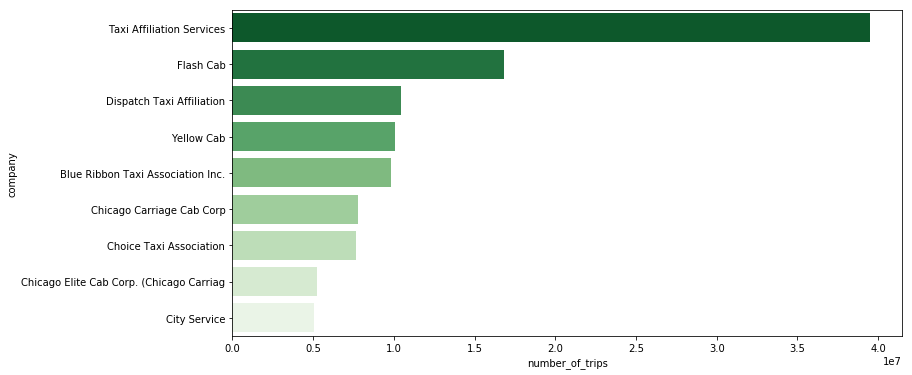

Above we can see that overall the Taxi Affiliation Services is used almost twice as frequently as the next most popular option. See below for how this barchart was generated and other relevent info.

In [1]:
#pip install kaggle --upgrade

In [2]:
from google.cloud import bigquery
import numpy as np
import pandas as pd

In [3]:
client = bigquery.Client()
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")
taxi_dat = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [4]:
tables = list(client.list_tables(taxi_dat))
for table in tables:
    print(table.table_id)

taxi_trips


In [5]:
table_ref = dataset_ref.table('taxi_trips')
table = client.get_table(table_ref)
table.schema

[SchemaField('unique_key', 'STRING', 'REQUIRED', 'Unique identifier for the trip.', ()),
 SchemaField('taxi_id', 'STRING', 'REQUIRED', 'A unique identifier for the taxi.', ()),
 SchemaField('trip_start_timestamp', 'TIMESTAMP', 'NULLABLE', 'When the trip started, rounded to the nearest 15 minutes.', ()),
 SchemaField('trip_end_timestamp', 'TIMESTAMP', 'NULLABLE', 'When the trip ended, rounded to the nearest 15 minutes.', ()),
 SchemaField('trip_seconds', 'INTEGER', 'NULLABLE', 'Time of the trip in seconds.', ()),
 SchemaField('trip_miles', 'FLOAT', 'NULLABLE', 'Distance of the trip in miles.', ()),
 SchemaField('pickup_census_tract', 'INTEGER', 'NULLABLE', 'The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips.', ()),
 SchemaField('dropoff_census_tract', 'INTEGER', 'NULLABLE', 'The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips.', ()),
 SchemaField('pickup_community_area', 'INTEGER', 'NULLABLE', '

In [6]:
first_query = """SELECT company, COUNT(1) AS number_of_trips 
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY company
ORDER BY number_of_trips DESC
"""


safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config=safe_config)
first_query_result = first_query_job.to_dataframe()
display(first_query_result)

,company,number_of_trips
0,Taxi Affiliation Services,39495690
1,None,33593407
2,Flash Cab,16824075
3,Dispatch Taxi Affiliation,10429966
4,Yellow Cab,10068857
...,...,...
160,0118 - Godfray S.Awir,37
161,3556 - RC Andrews Cab,7
162,Pacebus,6
163,DTA Test,3


In [7]:
plot_dat = first_query_result.head(10)
display(plot_dat)

,company,number_of_trips
0,Taxi Affiliation Services,39495690
1,None,33593407
2,Flash Cab,16824075
3,Dispatch Taxi Affiliation,10429966
4,Yellow Cab,10068857
5,Blue Ribbon Taxi Association Inc.,9826682
6,Chicago Carriage Cab Corp,7760717
7,Choice Taxi Association,7652238
8,Chicago Elite Cab Corp. (Chicago Carriag,5264156
9,City Service,5059330


# Initial summery:

Taxi Affiliation Services is the most common entry, the next closest is none. I'll plot my initial findings and then we will look at the changes over the years. We'll begin by removing the data where the company wasn't recorded.

In [8]:
plot_dat = plot_dat.drop(1)
display(plot_dat)

,company,number_of_trips
0,Taxi Affiliation Services,39495690
2,Flash Cab,16824075
3,Dispatch Taxi Affiliation,10429966
4,Yellow Cab,10068857
5,Blue Ribbon Taxi Association Inc.,9826682
6,Chicago Carriage Cab Corp,7760717
7,Choice Taxi Association,7652238
8,Chicago Elite Cab Corp. (Chicago Carriag,5264156
9,City Service,5059330


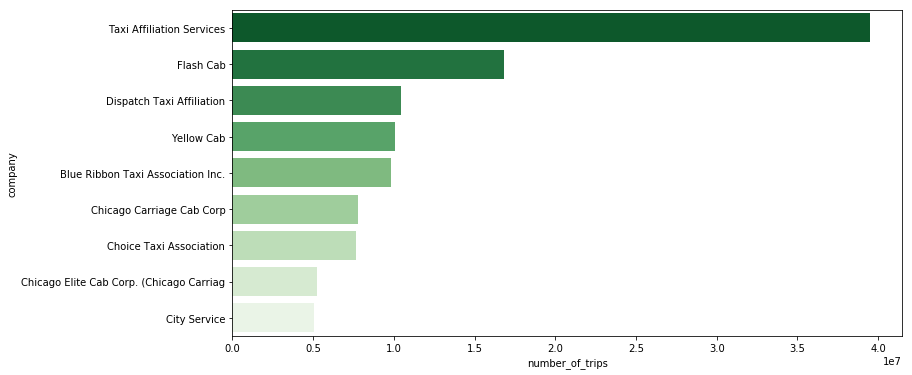

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12, 6))
sns.barplot(x=plot_dat['number_of_trips'],y=plot_dat['company'], palette='Greens_r')#color='#4CB391')

# Further examination

In [10]:
company=plot_dat.company.unique()
print(company)

['Taxi Affiliation Services' 'Flash Cab' 'Dispatch Taxi Affiliation'
 'Yellow Cab' 'Blue Ribbon Taxi Association Inc.'
 'Chicago Carriage Cab Corp' 'Choice Taxi Association'
 'Chicago Elite Cab Corp. (Chicago Carriag' 'City Service']


In [11]:
second_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY year, company
HAVING COUNT(1) >= 10000 /*This creates a much shorter output*/
ORDER BY year, company
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
second_query_job =client.query(second_query,job_config=safe_config)
second_query_result = second_query_job.to_dataframe()
second_query_result.head(10)


,year,num_trips,company
0,2013,9882739,None
1,2013,78433,American United
2,2013,1895390,Blue Ribbon Taxi Association Inc.
3,2013,1022858,Chicago Elite Cab Corp.
4,2013,729137,Chicago Elite Cab Corp. (Chicago Carriag
5,2013,44099,Chicago Medallion Management
6,2013,1281722,Choice Taxi Association
7,2013,2909871,Dispatch Taxi Affiliation
8,2013,265990,Flash Cab
9,2013,124163,KOAM Taxi Association


In [12]:
years = [2013,2014,2015,2016,2017,2018,2019,2020]
final_frame = pd.DataFrame(index=years,columns=company)
display(final_frame) #Now to populate the data

,Taxi Affiliation Services,Flash Cab,Dispatch Taxi Affiliation,Yellow Cab,Blue Ribbon Taxi Association Inc.,Chicago Carriage Cab Corp,Choice Taxi Association,Chicago Elite Cab Corp. (Chicago Carriag,City Service
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Taxi Affiliation Services'
GROUP BY year, company
ORDER BY year
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()
print(cp_query_result)
final_frame['Taxi Affiliation Services'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)
final_frame.head(9)

   year  num_trips                    company
0  2013    7855522  Taxi Affiliation Services
1  2014    9901938  Taxi Affiliation Services
2  2015    8145253  Taxi Affiliation Services
3  2016    5275090  Taxi Affiliation Services
4  2017    2177844  Taxi Affiliation Services
5  2018    2542697  Taxi Affiliation Services
6  2019    3597314  Taxi Affiliation Services
7  2020         32  Taxi Affiliation Services


,Taxi Affiliation Services,Flash Cab,Dispatch Taxi Affiliation,Yellow Cab,Blue Ribbon Taxi Association Inc.,Chicago Carriage Cab Corp,Choice Taxi Association,Chicago Elite Cab Corp. (Chicago Carriag,City Service
2013,7855522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,9901938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,8145253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,5275090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,2177844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,2542697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,3597314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#cp_query stands for copy pasted query, alot of the following queries were copy pasted off an initial one I wrote
#There probably was a better way to execute this, my guess is using subqueries
cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Flash Cab'
GROUP BY year, company
ORDER BY year
""" 
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()

cp_query_result2015 = pd.DataFrame(data=[[2015, 0, 'Flash Cab']], columns=['year', 'num_trips', 'company'],)
cp_query_result2015.head(10)
cp_query_result = cp_query_result.append(cp_query_result2015)
cp_query_result = cp_query_result.sort_values(by=['year'])
final_frame['Flash Cab'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)

#####

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Dispatch Taxi Affiliation'
GROUP BY year, company
ORDER BY year
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()


cp_query_result2015 = pd.DataFrame(data=[[2019, 0, 'Dispatch Taxi Affiliation'],[2020, 0, 'Dispatch Taxi Affiliation']], columns=['year', 'num_trips', 'company'],)
cp_query_result2015.head(10)
cp_query_result = cp_query_result.append(cp_query_result2015)
cp_query_result = cp_query_result.sort_values(by=['year'])

final_frame['Dispatch Taxi Affiliation'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)


#####

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Yellow Cab'
GROUP BY year, company
ORDER BY year
""" 

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
# API request - run the query, and return a pandas DataFrame
cp_query_result = cp_query_job.to_dataframe()
# View results

cp_query_result2015 = pd.DataFrame(data=[[2020, 0, 'Yellow Cab']], columns=['year', 'num_trips', 'company'],)
cp_query_result2015.head(10)
cp_query_result = cp_query_result.append(cp_query_result2015)
cp_query_result = cp_query_result.sort_values(by=['year'])

final_frame['Yellow Cab'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)

#####

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Blue Ribbon Taxi Association Inc.'
GROUP BY year, company
ORDER BY year
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()
final_frame['Blue Ribbon Taxi Association Inc.'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)


#####

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Chicago Carriage Cab Corp'
GROUP BY year, company
ORDER BY year
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()

cp_query_result2015 = pd.DataFrame(data=[[2013, 0, 'Chicago Carriage Cab Corp'],[2014, 0, 'Chicago Carriage Cab Corp'],[2015, 0, 'Chicago Carriage Cab Corp']], columns=['year', 'num_trips', 'company'],)
cp_query_result = cp_query_result.append(cp_query_result2015)
cp_query_result = cp_query_result.sort_values(by=['year'])

final_frame['Chicago Carriage Cab Corp'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)


#####

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Choice Taxi Association'
GROUP BY year, company
ORDER BY year
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()
final_frame['Choice Taxi Association'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)


#####

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'Chicago Elite Cab Corp. (Chicago Carriag'
GROUP BY year, company
ORDER BY year
""" 

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()
cp_query_result2015 = pd.DataFrame(data=[[2017, 0, 'Dispatch Taxi Affiliation'],[2018, 0, 'Chicago Elite Cab Corp. (Chicago Carriag'],[2019, 0, 'Dispatch Taxi Affiliation'], [2020, 0, 'Dispatch Taxi Affiliation']], columns=['year', 'num_trips', 'company'],)
cp_query_result = cp_query_result.append(cp_query_result2015)
cp_query_result = cp_query_result.sort_values(by=['year'])

final_frame['Chicago Elite Cab Corp. (Chicago Carriag'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)

######

cp_query ="""
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
COUNT(1) AS num_trips, company
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE company = 'City Service'
GROUP BY year, company
ORDER BY year
""" 


safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
cp_query_job =client.query(cp_query,job_config=safe_config)
cp_query_result = cp_query_job.to_dataframe()

cp_query_result2015 = pd.DataFrame(data=[[2013, 0, 'City Service'],[2014, 0, 'City Service'],[2015, 0, 'City Service']], columns=['year', 'num_trips', 'company'],)
cp_query_result = cp_query_result.append(cp_query_result2015)
cp_query_result = cp_query_result.sort_values(by=['year'])


final_frame['City Service'] = pd.Series([x for x in cp_query_result.num_trips], index=final_frame.index)
final_frame.head(9)

,Taxi Affiliation Services,Flash Cab,Dispatch Taxi Affiliation,Yellow Cab,Blue Ribbon Taxi Association Inc.,Chicago Carriage Cab Corp,Choice Taxi Association,Chicago Elite Cab Corp. (Chicago Carriag,City Service
2013,7855522,265990,2909871,6,1895390,0,1281722,729137,0
2014,9901938,3381631,2774464,1453316,2036946,0,1605421,1744968,0
2015,8145253,0,2262200,3194629,1778860,0,1460294,1870611,0
2016,5275090,4445083,1745274,2839587,1393228,1477373,1135016,919440,1078647
2017,2177844,3414415,721515,1824237,1007133,2187188,899376,0,1537441
2018,2542697,2843474,16642,754893,921818,2294373,731854,0,1346235
2019,3597314,2473477,0,2189,793297,1801778,538553,0,1097004
2020,32,5,0,0,10,5,2,0,3


I'm starting to suspect that Chicago Carriage Cab Corp and Chicago Elite Cab Corp. (Chicago Carriag might just be the same company. The names are very similair, they don't have any signifigant overlap in operational time (one didn't operate before 2016, the other stopped in 2016) and have you noticed the two are never in the same room at the same time >.>

In [15]:
company = list(company)
#print(company)

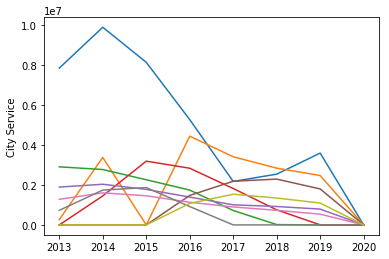

In [16]:
for col in company:
    sns.lineplot(x=final_frame.index, y=final_frame[col])

#This did not produce what i wanted but it shows an interesting trend
#The blue line represents Taxi Affiliation Services

# Final thoughts
We see a slight downward trend in taxi use as a whole (probably market disruption from Uber/Lyft), but overall, Taxi Affiliation Services still takes the cake. 

For the graph above one thing to note is that this includes data from 2020, which at the time of last commit was only a month underway so the downward spike at the end isn't signifigant. I chose not to exclude the final year so that this notebook could be reran for an updated veiw.


As one final note: I'm trying to do one Kaggle task a week (this would be my second week) if there is anything I could do to improve the format I'd appriciate any constructive feedback (for example how I could have written those queries better). You can message me directly or comment on the notebook itself.